In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [238]:
df = pd.read_csv('/Users/ikawahyuni/Downloads/Project Portofolio/project clustering /Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [239]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Univariate Analysis

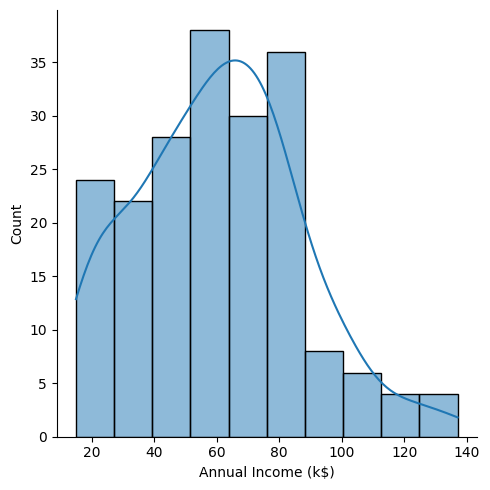

In [241]:
sns.displot(df['Annual Income (k$)'], kde=True)

In [242]:
df.groups = [df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)']]

/var/folders/76/1dyn986n0fqds4hg2_41_2p00000gn/T/ipykernel_1255/2782254639.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.groups = [df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)']]


<Figure size 640x480 with 0 Axes>

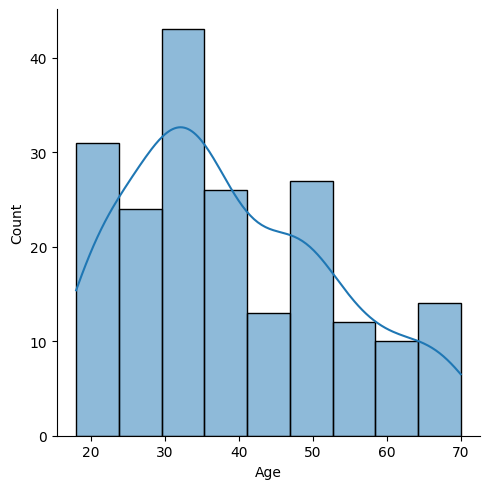

<Figure size 640x480 with 0 Axes>

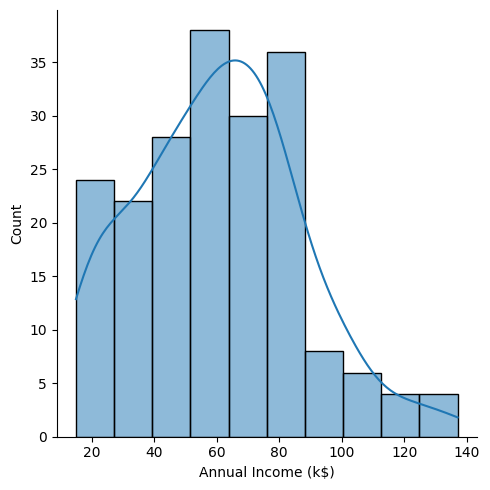

<Figure size 640x480 with 0 Axes>

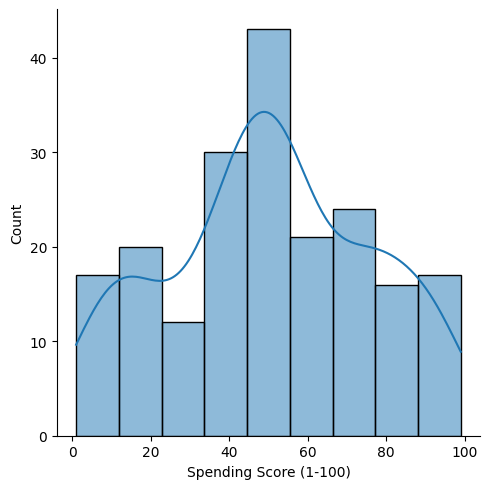

In [243]:
for i in df.groups:
    plt.figure()
    sns.displot(i, kde=True)

/var/folders/76/1dyn986n0fqds4hg2_41_2p00000gn/T/ipykernel_1255/2837052659.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(shade=True, hue= 'Gender', data=df, x=col)
/var/folders/76/1dyn986n0fqds4hg2_41_2p00000gn/T/ipykernel_1255/2837052659.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(shade=True, hue= 'Gender', data=df, x=col)
/var/folders/76/1dyn986n0fqds4hg2_41_2p00000gn/T/ipykernel_1255/2837052659.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(shade=True, hue= 'Gender', data=df, x=col)


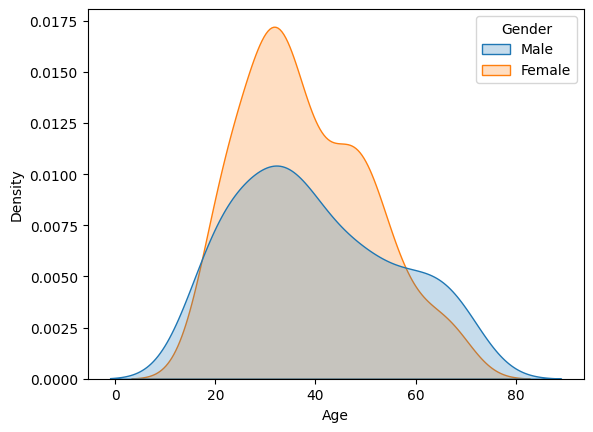

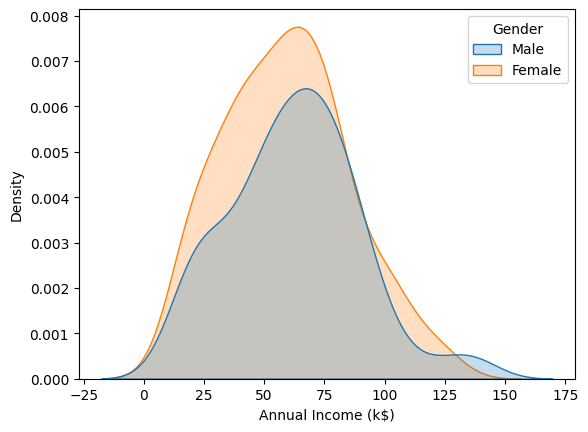

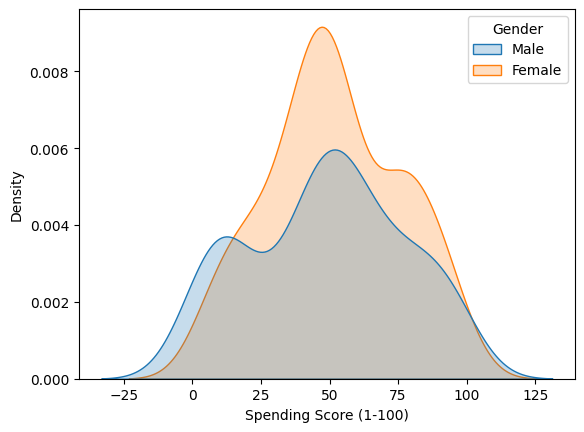

In [244]:
df.groups = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in df.groups:
    plt.figure()
    sns.kdeplot(shade=True, hue= 'Gender', data=df, x=col)



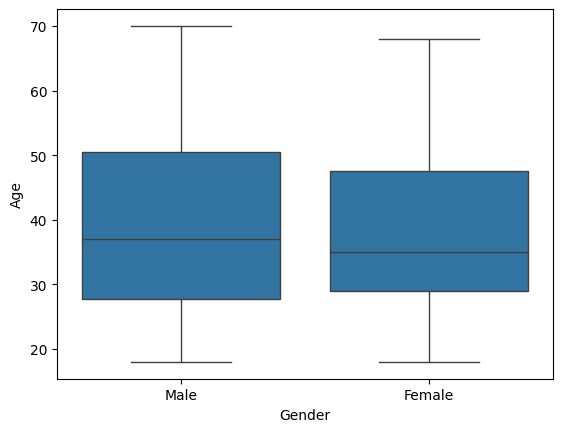

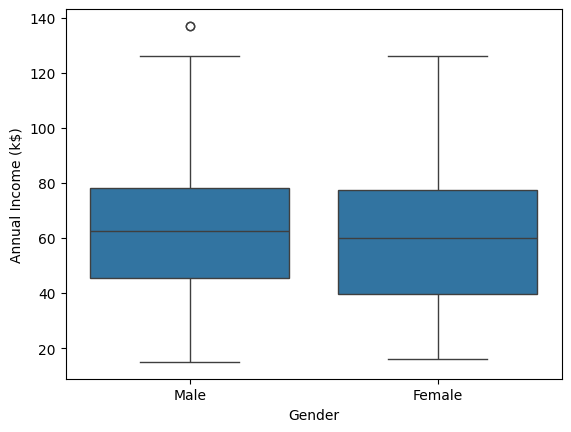

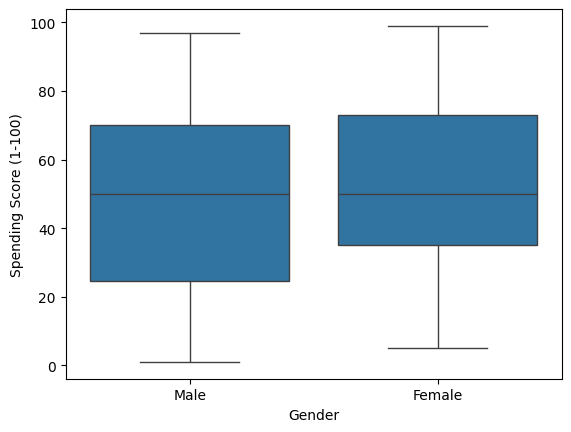

In [245]:
df.groups = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in df.groups:
    plt.figure()
    sns.boxplot(x='Gender', y=col, data=df)

In [246]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: ylabel='count'>

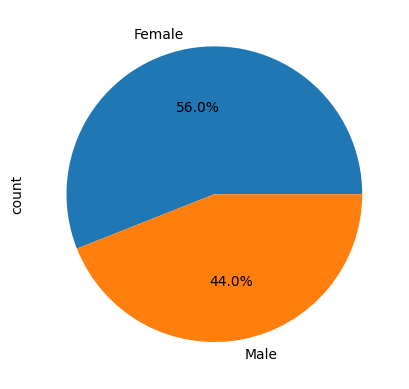

In [247]:

df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
#or  df['Gender'].value_counts(normalize=True)

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

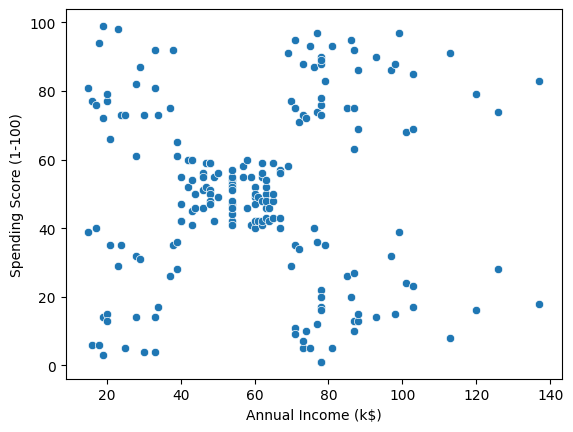

In [248]:
sns.scatterplot(x='Annual Income (k$)', y ='Spending Score (1-100)', data=df)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

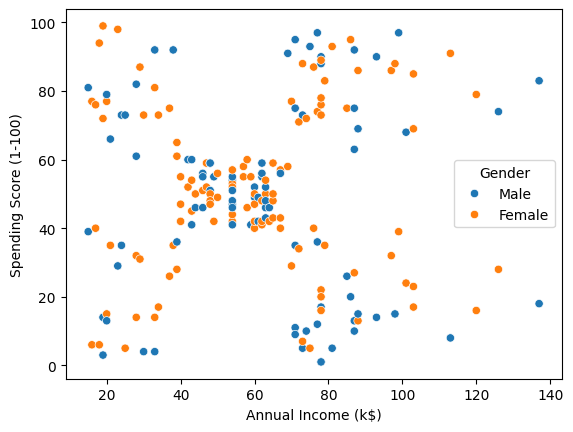

In [249]:
sns.scatterplot(x='Annual Income (k$)', y ='Spending Score (1-100)', data=df, hue='Gender')

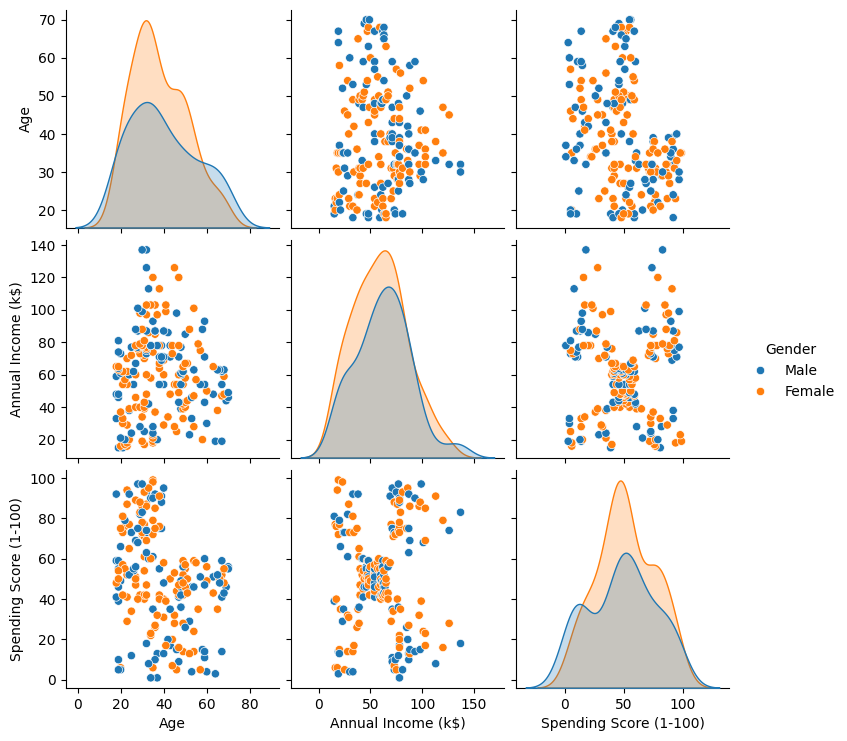

In [ ]:
#df = df.drop('CustomerID', axis=1)
sns.pairplot(df, hue='Gender')


In [251]:
#we want to know mean for each columns
df.groupby(['Gender']).mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [252]:
#or we can specify the columns we want to know the mean
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [259]:
#df = df.drop('Gender', axis=1)
#because we want to know the correlation between columns, we must drop Gender column because it is categorical data

In [ ]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


<Axes: >

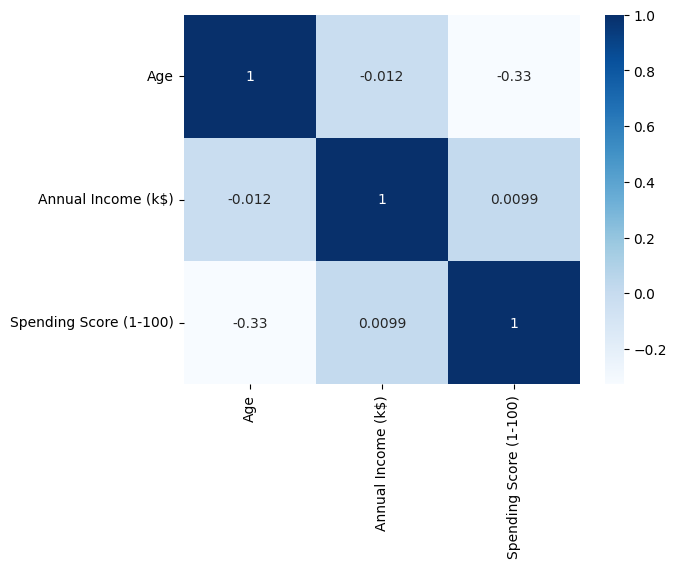

In [258]:
#now after drop 'Gender' column, we can see the correlation between columns
sns.heatmap(df.corr(), annot=True, cmap='Blues')

# Clustering - Univariate, Bivariate
## What column we want to cluster = 'Annual Income'

In [292]:
df2 = pd.read_csv('/Users/ikawahyuni/Downloads/Project Portofolio/project clustering /Mall_Customers.csv')
df2.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [293]:
#in this clustering method, we use algorithm. 
# So we fit the data into the algorithm and let them analyze our data(df) and it will find the clusters
clustering1 = KMeans(n_clusters=3)

In [294]:
clustering1.fit(df2[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [295]:
#df.drop('Income Cluster2', axis=1, inplace=True)
#df = df.drop('Gender', axis=1)

In [296]:
#here we want to know after fitting our data to algorith how many cluster appear

clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [297]:
#here we want to make 'Income Cluster' column and put it in our dataframe
df2['Income Cluster'] = clustering1.labels_
df2.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
5,6,Female,22,17,76,1
6,7,Female,35,18,6,1
7,8,Female,23,18,94,1
8,9,Male,64,19,3,1
9,10,Female,30,19,72,1


Using K-means clustering we still dont know how many cluster will fot with out data, so we use Elbow method. 


Masalahnya:
➡ Kita tidak tahu apakah data seharusnya dibagi menjadi 2, 3, 4, atau 10 cluster.

Maka kita pakai Elbow Method untuk mencari nilai k terbaik.

In [ ]:
#we want to know the value counts for each cluster
df2['Income Cluster'].value_counts()

Income Cluster
2    90
1    74
0    36
Name: count, dtype: int64

# inertia_ = seberapa baik data cocok ke cluster yang dibentuk

Lebih tepatnya:

👉 Inertia = total jarak kuadrat semua titik ke centroid clusternya

Semakin kecil inertia → semakin baik cluster menyatukan data yang mirip.

In [269]:
clustering1.inertia_

23528.152173913044

In [270]:
insertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    kmeans.inertia_
    insertia_scores.append(kmeans.inertia_)

In [271]:
insertia_scores

[137277.28000000003,
 49761.73701298701,
 24361.259213759215,
 13844.222098218703,
 8481.496190476191,
 8242.708530465949,
 4979.579259259259,
 2862.833028083028,
 2554.4303030303035,
 2014.7752525252527]

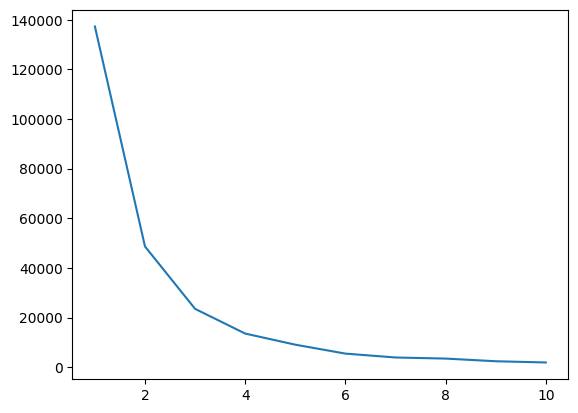

In [ ]:
plt.plot(range(1,11), insertia_scores)

Titik siku (elbow) = jumlah cluster paling efisien
Analogi gampang:

Bayangkan kamu berusaha memecah orang ke beberapa grup agar lebih mirip.

Dari 1 grup → 2 grup → perbedaan besar: wajar penurunannya besar

Dari 2 → 3 → masih logis ada penurunan signifikan

Dari 3 → 4 → perbaikan kecil, tidak sebanding dengan menambah cluster

Setelah itu grafik hampir datar, artinya kamu sudah tidak dapat keuntungan signifikan lagi.

👉 Elbow = titik terakhir saat penurunan inertia masih masuk akal secara bisnis.

## After analyzing elbow method we got 3 is the effiecient number of claster 
## so we change n_cluster = 3

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

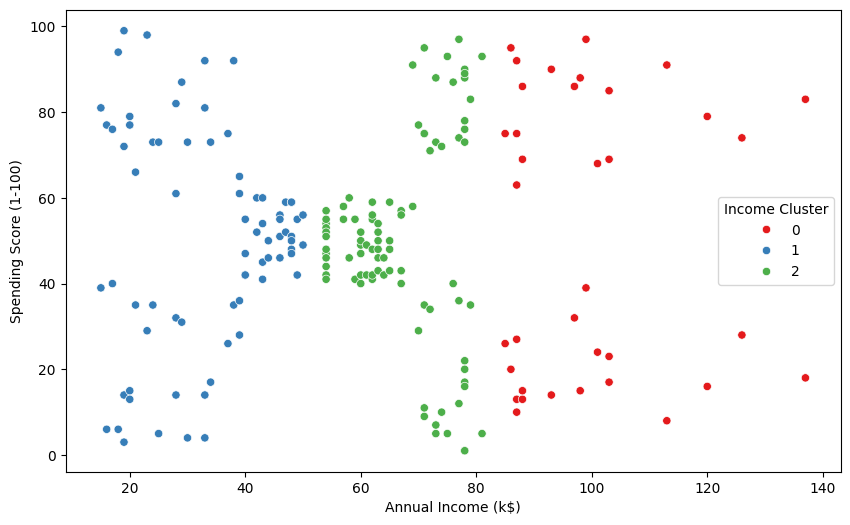

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income Cluster', data=df2, palette='Set1')
#we've got 3 clusters

In [300]:
df2.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [301]:
df2.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


# Bivariate Clustering

In [317]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df2[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5)

In [318]:
#after fitting the data we want to add the cluster to the dataframe
df2['Spending and Income Cluster'] = clustering2.labels_
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4


In [319]:
#we've got 8 clusters 
df2['Spending and Income Cluster'].value_counts()

Spending and Income Cluster
1    81
0    39
2    35
4    23
3    22
Name: count, dtype: int64

In [314]:
#we make a loop to find the insertia score for each cluster
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    kmeans2.inertia_
    intertia_scores2.append(kmeans2.inertia_)

Text(0, 0.5, 'Insertia Score')

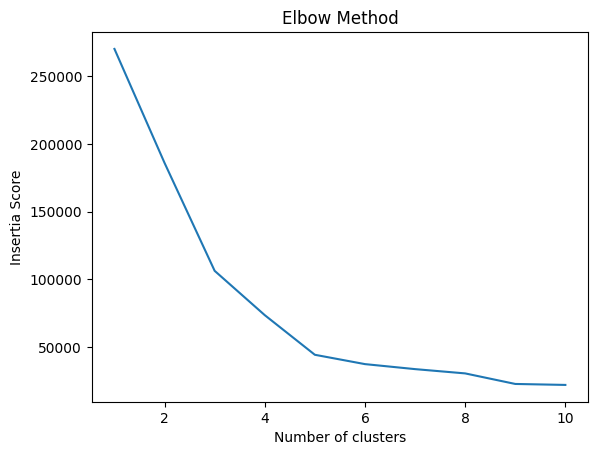

In [316]:
#we plot the insertia score to find the elbow point
plt.plot(range(1,11), intertia_scores2)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Insertia Score')

## We can now change the n_cluster above to 5 clusters and we can visualize using scatterplot

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

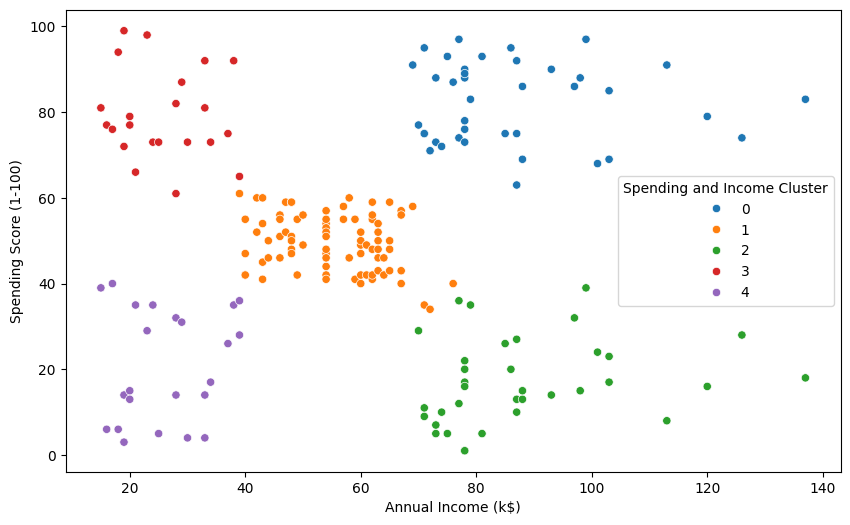

In [325]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', data=df2, palette='tab10')

In [341]:
clustering2.cluster_centers_
#in here we can see the center of each cluster, and we can use this to find the center of each cluster in the scatterplot above
#for the purple we can see the center is around (25, 20) 
# and for the red we can see the center is around (26, 79) 
# and for the orange we can see the center is around (55, 49) so on

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [344]:
#we want to add the center of each cluster to the figure
centers = pd.DataFrame(clustering2.cluster_centers_)
centers

,0,1
0,86.538462,82.128205
1,55.296296,49.518519
2,88.200000,17.114286
3,25.727273,79.363636
4,26.304348,20.913043


In [348]:
centers.columns = ['x', 'y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

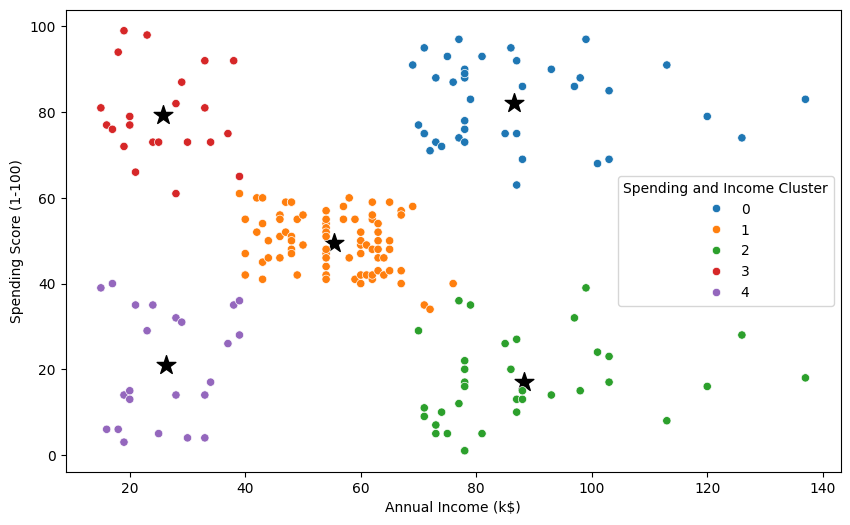

In [350]:
plt.figure(figsize=(10,6))
plt.scatter(centers['x'], centers['y'], s=200, c='black', marker='*')
sns.scatterplot(data=df2, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')

In [ ]:
#pd.crosstab() digunakan untuk membuat tabel frekuensi (tabulasi silang / cross-tabulation) antara dua variabel kategorikal.
#Jadi kamu bisa melihat jumlah atau distribusi kategori terhadap kategori lainnya.

pd.crosstab(df2['Spending and Income Cluster'], df2['Gender'])

Gender,Female,Male
Spending and Income Cluster,,
0,21,18
1,48,33
2,16,19
3,13,9
4,14,9


In [ ]:
#we want to make it to precentage (%) so we use mormalize='index' 
#using normalize or percentage is highly desirable to interpret the data
pd.crosstab(df2['Spending and Income Cluster'],df2['Gender'],normalize ='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [363]:
df2.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


## From df2.groupby above we can see the cluster no.0 with Age = 32, have a high Annual Income and hig Spending Score = 82 compare to other cluster.
## So the company might want to centainly look at the cluster no.0 before generate any campaigns. Cluster no.0 presents 54% shoppers are women and we should look for ways to attract these customers using marketing campaign ,targeting popular items in this cluster


## But there is one cluster (no.3) also have a high Spending Score =79 with the lowest Annual Income. This needs to run a deep research. Might be the customer of this cluster only had their purchase for discount, promotion etc.

In [366]:
df2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0
196,197,Female,45,126,28,0,2
197,198,Male,32,126,74,0,0
198,199,Male,32,137,18,0,2


In [368]:
#here I want to save the dataframe to csv file 
df2.to_csv('Mall Customers with K-Means Clustering Results.csv', index=False)